In [1]:
import os
import pandas as pd
from arcgis import GIS
import arcpy
import numpy as np
from arcgis.features import GeoAccessor, GeoSeriesAccessor
arcpy.env.overwriteOutput = True

# show all columns
pd.options.display.max_columns = None

In [2]:
inputTable = pd.read_csv(r"C:\AdHocProjects\HousingInventory\HousingInventoryMetrics\Inputs\salt_lake_county_residential_units.csv")

In [3]:
# value stuff
inputTable["BUILT_DECADE"] = inputTable["BUILT_DECADE"].fillna("0000's")
inputTable["DECADE_INT"] = inputTable["BUILT_DECADE"].str.slice(stop = 4)
inputTable["DECADE_INT"] = inputTable["DECADE_INT"].astype(int)

In [4]:
inputTable.head

<bound method NDFrame.head of         Unnamed: 0  TOTAL_MKT_VALUE  LAND_MKT_VALUE  PARCEL_ACRES  HOUSE_CNT  \
0                0         544800.0        142800.0      4.667300        1.0   
1                1         335700.0        141400.0      4.894619        1.0   
2                2         248500.0         39200.0      0.395193        1.0   
3                3         279000.0         65000.0      0.831928        1.0   
4                4         159100.0         41100.0      0.428906        1.0   
...            ...              ...             ...           ...        ...   
244211         576         503300.0         71700.0      0.245349        1.0   
244212         577       29324100.0       1649600.0     13.242291        0.0   
244213         578       14856800.0        170500.0      4.186963        1.0   
244214         579       25278100.0        931000.0      5.078801        0.0   
244215         580        2426400.0        208700.0      1.268983        0.0   

        B

In [8]:
# pivot basics
housing_pivot = pd.pivot_table(inputTable, values='ap_count', index = 'DECADE_INT', columns='SUBTYPE_WFRC', aggfunc='sum').reset_index()

In [9]:
housing_pivot

SUBTYPE_WFRC,DECADE_INT,apartment,apartment_low_income,condo,duplex,mixed,mobile_home,single_family,townhouse
0,0,2905.0,408.0,1929.0,NaN,NaN,455.0,2148.0,1891.0
1,1840,4.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,1850,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN
3,1860,10.0,NaN,NaN,NaN,NaN,NaN,21.0,NaN
4,1870,15.0,NaN,NaN,10.0,NaN,NaN,71.0,NaN
5,1880,64.0,NaN,NaN,18.0,NaN,NaN,272.0,NaN
6,1890,420.0,24.0,5.0,112.0,NaN,NaN,1477.0,NaN
7,1900,1580.0,212.0,134.0,496.0,NaN,NaN,4220.0,NaN
8,1910,1442.0,225.0,384.0,482.0,NaN,NaN,5783.0,NaN
9,1920,1495.0,378.0,310.0,540.0,NaN,36.0,6961.0,NaN


In [12]:
#filter rows
query = housing_pivot["DECADE_INT"] > 1939
recenthousing_pivot = housing_pivot[query]


<AxesSubplot:title={'center':'Housing Units By Type, By Decade'}, xlabel='DECADE_INT'>

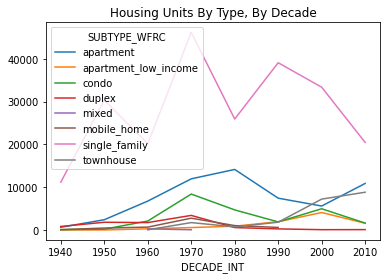

In [16]:
colorlist = 
recenthousing_pivot.set_index("DECADE_INT").plot(title='Housing Units By Type, By Decade')
